In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn import datasets

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import csv
data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/analyze_fake_news_stories.csv", error_bad_lines= False)
data.head()

,title,link,body,tokenized_title,tokenized_body,num_wds,num_wds_title,uniq_wds_body,without_stopwords,lemmatized_body,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,title_clean,body_clean,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,words_pos,title_pos,nouns,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses
0,«Κλείδωσε» η υποψηφιότητα Φουρθιώτη στο πλευρό...,https://www.newsbreak.gr/politiki/181856/kleid...,"Όπως όλα δείχνουν, ο Μένιος Φουρθιώτης που ήδη...",κλείδωσε η υποψηφιότητα φουρθιώτη στο πλευρό ...,όπως όλα δείχνουν ο μένιος φουρθιώτης που ήδη ...,210,8,135,δείχνουν μένιος φουρθιώτης θέσει λειτουργία π...,δείχνω μένιος φουρθιώτη θέσω λειτουργία πολι...,3,17,5,1,4,6,7,2,9,6,« ΚΛΕΙΔΩΣ » Η ΥΠΟΨΗΦΙΟΤΗΤ ΦΟΥΡΘΙΩΤ ΣΤ ΠΛΕΥΡ ΤΟ...,ΔΕΙΧΝ ΜΕΝ ΦΟΥΡΘΙΩΤ ΘΕΣ ΛΕΙΤΟΥΡΓ ΠΟΛΙΤ ΓΡΑΦΕ...,0.083735,0.0000,0.064147,0.000000,0.184559,0.13300,0.049147,0.000,"['SPACE', 'VERB', 'ADJ', 'NOUN', 'VERB', 'NOUN...","['PUNCT', 'VERB', 'PUNCT', 'DET', 'NOUN', 'X',...",51,21,23,4,0,0,1,2.428571,0,0,0
1,Θανάσης Καμηλάρης: “Λαθροδιακινητές ήταν οι κλ...,https://www.pentapostagma.gr/ethnika-themata/e...,Ακούστε τον Θανάση Καμηλάρη – κάτοικο του Δέλτ...,θανάσης καμηλάρης λαθροδιακινητές ήταν οι κλέφ...,ακούστε τον θανάση καμηλάρη κάτοικο του δέλτα ...,21,12,20,ακούστε θανάση καμηλάρη κάτοικο δέλτα έβρου αν...,ακούστε θανάση καμηλάρη κάτοικο δέλτα έβρου αν...,0,0,0,0,0,0,0,0,0,0,"ΘΑΝΑΣ ΚΑΜΗΛΑΡ : "" ΛΑΘΡΟΔΙΑΚΙΝΗΤ ΗΤ Ο ΚΛΕΦΤ ΤΗΣ...",ΑΚΟΥΣΤ ΘΑΝΑΣ ΚΑΜΗΛΑΡ ΚΑΤΟΙΚ ΔΕΛΤ ΕΒΡ ΑΝΑΦΕΡ ΠΡ...,0.000000,0.5610,0.000000,0.547000,0.094000,0.00000,0.000000,0.422,"['VERB', 'X', 'ADJ', 'NOUN', 'NOUN', 'PRON', '...","['PROPN', 'PROPN', 'PUNCT', 'PUNCT', 'X', 'AUX...",4,2,3,1,1,0,0,2.000000,0,0,0
2,Νέο σκάνδαλο με το εμβόλιο της Pfizer: Μειώνου...,https://www.pronews.gr/kosmos/eyropaiki-enosi/...,Ο Ευρωπαϊκός Οργανισμός Φαρμάκων ανακοίνωσε σή...,νέο σκάνδαλο με το εμβόλιο της pfizer μειώνουν...,ο ευρωπαϊκός οργανισμός φαρμάκων ανακοίνωσε σή...,267,19,164,ευρωπαϊκός οργανισμός φαρμάκων ανακοίνωσε σήμ...,ευρωπαϊκός οργανισμός φαρμάκας ανακοίνωσε σή...,0,13,2,0,1,9,5,1,3,3,ΝΕ ΣΚΑΝΔΑΛ ΜΕ ΤΟ ΕΜΒΟΛ ΤΗΣ PFIZER : ΜΕΙΩΝ ΤΗ Δ...,ΕΥΡΩΠΑΙΚ ΟΡΓΑΝΙΣΜ ΦΑΡΜΑΚ ΑΝΑΚΟΙΝΩΣ ΣΗΜΕΡ ΜΕ...,0.084833,0.1175,0.038611,0.136750,0.123889,0.23175,0.042333,0.000,"['SPACE', 'ADJ', 'NOUN', 'NOUN', 'VERB', 'ADV'...","['ADJ', 'NOUN', 'ADP', 'DET', 'NOUN', 'DET', '...",55,34,15,6,2,0,2,1.617647,0,0,0
3,Η ΜΕΓΑΛΥΤΕΡΗ ΑΠΑΤΗ ΣΤΗΝ ΙΣΤΟΡΙΑ ΤΩΝ ΗΠΑ! – ΤΟ ...,https://www.makeleio.gr/εξωφυλλο/Η-ΜΕΓΑΛΥΤΕΡΗ-...,Διαβάστε το άρθρο του Αμερικανού οικονομολόγου...,η μεγαλυτερη απατη στην ιστορια των ηπα το λογ...,διαβάστε το άρθρο του αμερικανού οικονομολόγου...,967,39,492,διαβάστε άρθρο αμερικανού οικονομολόγου paul c...,διαβάμαι άρθρο αμερικανός οικονομολόγος paul c...,37,69,15,17,19,43,39,30,71,30,Η ΜΕΓΑΛ ΑΠΑΤ ΣΤΗΝ ΙΣΤΟΡ ΤΟ ΗΠ ! – ΤΟ ΛΟΓΙΣΜ ΠΟ...,ΔΙΑΒ ΑΡΘΡ ΑΜΕΡΙΚΑΝ ΟΙΚΟΝΟΜΟΛΟΓ PAUL CRAIG ROBE...,0.349924,0.2849,0.292826,0.143800,0.103652,0.07490,0.167408,0.164,"['VERB', 'NOUN', 'PROPN', 'NOUN', 'X', 'ADP', ...","['DET', 'PROPN', 'X', 'PROPN', 'NOUN', 'NOUN',...",233,107,103,15,6,1,2,2.177570,0,0,9
4,Συγκλονιστικό βίντεο: Αρμένιος στρατιώτης αναφ...,https://www.pronews.gr/amyna-asfaleia/enoples-...,Ενα συγκλονιστικό βίντεο που δείχνει Αρμένιο σ...,συγκλονιστικό βίντεο αρμένιος στρατιώτης αναφέ...,ενα συγκλονιστικό βίντεο που δείχνει αρμένιο σ...,108,12,88,ενα συγκλονιστικό βίντεο δείχνει αρμένιο στρατ...,ενα συγκλονιστικό βίντεο δείχνω αρμένιος στρατ...,6,9,2,0,3,5,3,3,6,6,ΣΥΓΚΛΟΝΙΣΤ ΒΙΝΤΕ : ΑΡΜΕΝ ΣΤΡΑΤΙΩΤ ΑΝΑΦΕΡ ΣΕ ΑΞ...,ΕΝ ΣΥΓΚΛΟΝΙΣΤ ΒΙΝΤΕ ΔΕΙΧΝ ΑΡΜΕΝ ΣΤΡΑΤΙΩΤ Ν ΑΝΑ...,0.246294,0.2280,0.172765,0.166667,0.094588,0.00000,0.103353,0.091,"['DET', 'ADJ', 'X', 'VERB', 'ADJ', 'NOUN', 'NO...","['ADJ', 'X', 'PUNCT', 'ADJ', 'NOUN', 'VERB', '...",24,12,14,1,0,0,1,2.000000,0,0,0


In [ ]:
data.shape

(1087, 43)

In [ ]:
data.isnull().sum()

title                  0
link                   0
body                  15
tokenized_title        0
tokenized_body        15
num_wds                0
num_wds_title          0
uniq_wds_body          0
without_stopwords     15
lemmatized_body       15
anger                  0
positivity             0
joy                    0
disgust                0
surprise               0
trust                  0
anticipation           0
sadness                0
negative               0
fear                   0
title_clean            0
body_clean             0
Anger_intensity       30
Anger_int_Title      112
Fear_intensity        30
Fear_int_Title       112
Joy_intensity         30
Joy_int_Title        112
Sad_intensity         30
Sad_int_Title        112
words_pos              0
title_pos              0
nouns                  0
verbs                  0
adjectives             0
adverbs                0
pronouns               0
punctuation            0
verbs_title            0
ratio                 10


In [ ]:
data2 = pd.read_csv("/gdrive/My Drive/Colab Notebooks/analyze_cnn_stories.csv", error_bad_lines= False)
data2.head()

,title,link,body,tokenized_title,tokenized_body,num_wds,num_wds_title,uniq_wds_body,without_stopwords,lemmatized_body,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,title_clean,body_clean,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,words_pos,title_pos,noun,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses
0,Θάνατος οπαδού στη Θεσσαλονίκη: Τι λέει το πόρ...,https://www.cnn.gr/ellada/story/203229/thanato...,"Σε κακώσεις στην κοιλιά, που προκλήθηκαν από τ...",θάνατος οπαδού στη θεσσαλονίκη τι λέει το πόρι...,σε κακώσεις στην κοιλιά που προκλήθηκαν από τη...,203,13,145,κακώσεις κοιλιά προκλήθηκαν παράσυρσή αυτοκίν...,κακώση κοιλιά προκλούμαι παράσυρσή αυτοκίνητ...,7,12,4,8,8,7,7,9,16,12,ΘΑΝΑΤ ΟΠΑΔ ΣΤ ΘΕΣΣΑΛΟΝ : ΤΙ ΛΕ ΤΟ ΠΟΡΙΣΜ ΤΗΣ Ι...,ΚΑΚΩΣ ΚΟΙΛ ΠΡΟΚΛ ΠΑΡΑΣΥΡΣ ΑΥΤΟΚΙΝΗΤ ΦΕΡ ΑΠΟΔ...,0.282605,0.191333,0.384368,0.619667,0.140132,0.000000,0.343658,0.544000,"['SPACE', 'NOUN', 'NOUN', 'VERB', 'ADV', 'NOUN...","['X', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'PRON',...",49,20,21,3,0,0,1,2.450000,0,0,1
1,Συναυλία με έργα Bach και Janáček από την Ελλη...,https://www.cnn.gr/style/politismos/story/2032...,Η Ελληνική Συμφωνική Ορχήστρα Νέων (ΕΛΣΟΝ) εμφ...,συναυλία με έργα bach και janáček από την ελλη...,η ελληνική συμφωνική ορχήστρα νέων ελσον εμφαν...,750,14,402,ελληνική συμφωνική ορχήστρα νέων ελσον εμφανί...,ελληνικός συμφωνικός ορχήστρα νέα ελσον εμφα...,27,65,48,1,17,46,17,30,2,2,ΣΥΝΑΥΛ ΜΕ ΕΡΓ BACH ΚΑΙ JANÁČEK ΑΠΟ ΤΗΝ ΕΛΛΗΝ Σ...,ΕΛΛΗΝ ΣΥΜΦΩΝ ΟΡΧΗΣΤΡ ΝΕ ΕΛΣΟΝ ΕΜΦΑΝΙΖ ΦΟΡ ΔΗ...,0.061512,0.044000,0.044851,0.000000,0.387835,0.429333,0.074868,0.036333,"['SPACE', 'ADJ', 'ADJ', 'NOUN', 'NOUN', 'NOUN'...","['NOUN', 'ADP', 'NOUN', 'X', 'CCONJ', 'PROPN',...",163,42,123,25,5,3,0,3.880952,3,0,4
2,Πρώτη των πρώτων η Πειραιώς Χρηματιστηριακή γι...,https://www.cnn.gr/oikonomia/story/203231/prot...,Στην κορυφή έφτασε η Πειραιώς ΑΕΠΕΥ ύστερα από...,πρώτη των πρώτων η πειραιώς χρηματιστηριακή γι...,στην κορυφή έφτασε η πειραιώς αεπευ ύστερα από...,190,11,138,κορυφή έφτασε πειραιώς αεπευ τριετία σταθερά ...,κορυφή έφτασε πειραιώς αεπευ τριετία σταθερά...,1,8,1,2,2,9,0,0,4,3,ΠΡΩΤ ΤΩΝ ΠΡΩΤ Η ΠΕΙΡΑΙΩΣ ΧΡΗΜΑΤΙΣΤΗΡΙΑΚ ΓΙΑ ΤΟ...,ΚΟΡΥΦ ΕΦΤΑΣ ΠΕΙΡΑΙΩΣ ΑΕΠΕ ΤΡΙΕΤ ΣΤΑΘΕΡ ΑΝΟΔ ...,0.080469,NaN,0.190656,NaN,0.134437,NaN,0.038562,NaN,"['SPACE', 'NOUN', 'VERB', 'ADV', 'VERB', 'NOUN...","['NUM', 'DET', 'PROPN', 'DET', 'ADJ', 'NOUN', ...",38,19,30,7,0,0,0,2.000000,3,0,1
3,Πέντε χρόνια από την τραγωδία του Charlie Hebd...,https://www.cnn.gr/kosmos/story/203232/pente-x...,Πέντε χρόνια συμπληρώνονται σήμερα από την τρο...,πέντε χρόνια από την τραγωδία του charlie hebd...,πέντε χρόνια συμπληρώνονται σήμερα από την τρο...,403,14,243,πέντε χρόνια συμπληρώνονται σήμερα τρομοκρατικ...,πέντε χρόνια συμπληρώνομαι σήμερα τρομοκρατικό...,6,26,5,3,6,16,8,8,12,8,ΠΕΝΤ ΧΡΟΝ ΑΠΟ ΤΗΝ ΤΡΑΓΩΔ ΤΟΥ CHARLIE HEBDO : Τ...,ΠΕΝΤ ΧΡΟΝ ΣΥΜΠΛΗΡΩΝ ΣΗΜΕΡ ΤΡΟΜΟΚΡΑΤ ΕΠΙΘΕΣ ΓΡΑ...,0.344000,0.000000,0.364032,0.536333,0.138742,0.151667,0.198919,0.468667,"['NUM', 'NOUN', 'VERB', 'ADV', 'ADJ', 'NOUN', ...","['NUM', 'NOUN', 'ADP', 'DET', 'NOUN', 'DET', '...",90,54,39,15,1,1,0,1.666667,0,0,2
4,Λάρισα: Έρευνα διέταξε ο Μητροπολίτης για τον ...,https://www.cnn.gr/ellada/story/203233/larisa-...,Μετά τις καταγγελίες για χειροδικία ιερέα εις ...,λάρισα έρευνα διέταξε ο μητροπολίτης για τον ι...,μετά τις καταγγελίες για χειροδικία ιερέα εις ...,206,15,141,καταγγελίες χειροδικία ιερέα βάρους 60χρονης ...,καταγγελία χειροδικία ιερέας βάρος 60χρονη λ...,7,16,8,5,7,14,9,4,9,12,ΛΑΡΙΣ : ΕΡΕΥΝ ΔΙΕΤΑΞ Ο ΜΗΤΡΟΠΟΛΙΤ ΓΙΑ ΤΟΝ ΙΕΡ ...,ΚΑΤΑΓΓΕΛ ΧΕΙΡΟΔΙΚ ΙΕΡ ΒΑΡ 60ΧΡΟΝΗΣ ΛΑΡΙΣ ΜΗΤ...,0.216222,0.000000,0.176600,0.000000,0.233356,0.000000,0.117578,0.000000,"['SPACE', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOU...","['PROPN', 'PUNCT', 'NOUN', 'VERB', 'DET', 'PRO...",50,24,17,6,0,4,3,2.083333,1,0,1


In [ ]:
data2.shape

(2760, 43)

In [ ]:
data2.rename(columns = {'noun':'nouns'}, inplace = True)

In [ ]:
data2

,title,link,body,tokenized_title,tokenized_body,num_wds,num_wds_title,uniq_wds_body,without_stopwords,lemmatized_body,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,title_clean,body_clean,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,words_pos,title_pos,nouns,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses
0,Θάνατος οπαδού στη Θεσσαλονίκη: Τι λέει το πόρ...,https://www.cnn.gr/ellada/story/203229/thanato...,"Σε κακώσεις στην κοιλιά, που προκλήθηκαν από τ...",θάνατος οπαδού στη θεσσαλονίκη τι λέει το πόρι...,σε κακώσεις στην κοιλιά που προκλήθηκαν από τη...,203,13,145,κακώσεις κοιλιά προκλήθηκαν παράσυρσή αυτοκίν...,κακώση κοιλιά προκλούμαι παράσυρσή αυτοκίνητ...,7,12,4,8,8,7,7,9,16,12,ΘΑΝΑΤ ΟΠΑΔ ΣΤ ΘΕΣΣΑΛΟΝ : ΤΙ ΛΕ ΤΟ ΠΟΡΙΣΜ ΤΗΣ Ι...,ΚΑΚΩΣ ΚΟΙΛ ΠΡΟΚΛ ΠΑΡΑΣΥΡΣ ΑΥΤΟΚΙΝΗΤ ΦΕΡ ΑΠΟΔ...,0.282605,0.191333,0.384368,0.619667,0.140132,0.000000,0.343658,0.544000,"['SPACE', 'NOUN', 'NOUN', 'VERB', 'ADV', 'NOUN...","['X', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'PRON',...",49,20,21,3,0,0,1,2.450000,0,0,1
1,Συναυλία με έργα Bach και Janáček από την Ελλη...,https://www.cnn.gr/style/politismos/story/2032...,Η Ελληνική Συμφωνική Ορχήστρα Νέων (ΕΛΣΟΝ) εμφ...,συναυλία με έργα bach και janáček από την ελλη...,η ελληνική συμφωνική ορχήστρα νέων ελσον εμφαν...,750,14,402,ελληνική συμφωνική ορχήστρα νέων ελσον εμφανί...,ελληνικός συμφωνικός ορχήστρα νέα ελσον εμφα...,27,65,48,1,17,46,17,30,2,2,ΣΥΝΑΥΛ ΜΕ ΕΡΓ BACH ΚΑΙ JANÁČEK ΑΠΟ ΤΗΝ ΕΛΛΗΝ Σ...,ΕΛΛΗΝ ΣΥΜΦΩΝ ΟΡΧΗΣΤΡ ΝΕ ΕΛΣΟΝ ΕΜΦΑΝΙΖ ΦΟΡ ΔΗ...,0.061512,0.044000,0.044851,0.000000,0.387835,0.429333,0.074868,0.036333,"['SPACE', 'ADJ', 'ADJ', 'NOUN', 'NOUN', 'NOUN'...","['NOUN', 'ADP', 'NOUN', 'X', 'CCONJ', 'PROPN',...",163,42,123,25,5,3,0,3.880952,3,0,4
2,Πρώτη των πρώτων η Πειραιώς Χρηματιστηριακή γι...,https://www.cnn.gr/oikonomia/story/203231/prot...,Στην κορυφή έφτασε η Πειραιώς ΑΕΠΕΥ ύστερα από...,πρώτη των πρώτων η πειραιώς χρηματιστηριακή γι...,στην κορυφή έφτασε η πειραιώς αεπευ ύστερα από...,190,11,138,κορυφή έφτασε πειραιώς αεπευ τριετία σταθερά ...,κορυφή έφτασε πειραιώς αεπευ τριετία σταθερά...,1,8,1,2,2,9,0,0,4,3,ΠΡΩΤ ΤΩΝ ΠΡΩΤ Η ΠΕΙΡΑΙΩΣ ΧΡΗΜΑΤΙΣΤΗΡΙΑΚ ΓΙΑ ΤΟ...,ΚΟΡΥΦ ΕΦΤΑΣ ΠΕΙΡΑΙΩΣ ΑΕΠΕ ΤΡΙΕΤ ΣΤΑΘΕΡ ΑΝΟΔ ...,0.080469,NaN,0.190656,NaN,0.134437,NaN,0.038562,NaN,"['SPACE', 'NOUN', 'VERB', 'ADV', 'VERB', 'NOUN...","['NUM', 'DET', 'PROPN', 'DET', 'ADJ', 'NOUN', ...",38,19,30,7,0,0,0,2.000000,3,0,1
3,Πέντε χρόνια από την τραγωδία του Charlie Hebd...,https://www.cnn.gr/kosmos/story/203232/pente-x...,Πέντε χρόνια συμπληρώνονται σήμερα από την τρο...,πέντε χρόνια από την τραγωδία του charlie hebd...,πέντε χρόνια συμπληρώνονται σήμερα από την τρο...,403,14,243,πέντε χρόνια συμπληρώνονται σήμερα τρομοκρατικ...,πέντε χρόνια συμπληρώνομαι σήμερα τρομοκρατικό...,6,26,5,3,6,16,8,8,12,8,ΠΕΝΤ ΧΡΟΝ ΑΠΟ ΤΗΝ ΤΡΑΓΩΔ ΤΟΥ CHARLIE HEBDO : Τ...,ΠΕΝΤ ΧΡΟΝ ΣΥΜΠΛΗΡΩΝ ΣΗΜΕΡ ΤΡΟΜΟΚΡΑΤ ΕΠΙΘΕΣ ΓΡΑ...,0.344000,0.000000,0.364032,0.536333,0.138742,0.151667,0.198919,0.468667,"['NUM', 'NOUN', 'VERB', 'ADV', 'ADJ', 'NOUN', ...","['NUM', 'NOUN', 'ADP', 'DET', 'NOUN', 'DET', '...",90,54,39,15,1,1,0,1.666667,0,0,2
4,Λάρισα: Έρευνα διέταξε ο Μητροπολίτης για τον ...,https://www.cnn.gr/ellada/story/203233/larisa-...,Μετά τις καταγγελίες για χειροδικία ιερέα εις ...,λάρισα έρευνα διέταξε ο μητροπολίτης για τον ι...,μετά τις καταγγελίες για χειροδικία ιερέα εις ...,206,15,141,καταγγελίες χειροδικία ιερέα βάρους 60χρονης ...,καταγγελία χειροδικία ιερέας βάρος 60χρονη λ...,7,16,8,5,7,14,9,4,9,12,ΛΑΡΙΣ : ΕΡΕΥΝ ΔΙΕΤΑΞ Ο ΜΗΤΡΟΠΟΛΙΤ ΓΙΑ ΤΟΝ ΙΕΡ ...,ΚΑΤΑΓΓΕΛ ΧΕΙΡΟΔΙΚ ΙΕΡ ΒΑΡ 60ΧΡΟΝΗΣ ΛΑΡΙΣ ΜΗΤ...,0.216222,0.000000,0.176600,0.000000,0.233356,0.000000,0.117578,0.000000,"['SPACE', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOU...","['PROPN', 'PUNCT', 'NOUN', 'VERB', 'DET', 'PRO...",50,24,17,6,0,4,3,2.083333,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

**Preparing the data**

In [ ]:
fake = 0

In [ ]:
true = 1

In [ ]:
data['Is_Fake'] = true

In [ ]:
data2['Is_Fake'] = fake

In [ ]:
all_data = pd.concat([data, data2], ignore_index=True)

In [ ]:
all_data.tail()

,title,link,body,tokenized_title,tokenized_body,num_wds,num_wds_title,uniq_wds_body,without_stopwords,lemmatized_body,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,title_clean,body_clean,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,words_pos,title_pos,nouns,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses,Is_Fake
3842,Κρεμλίνο: Αντικρουόμενες οι πληροφορίες για το...,https://www.cnn.gr/kosmos/story/89487/kremlino...,Το Κρεμλίνο έχει στη διάθεσή του «αντικρουόμεν...,κρεμλίνο αντικρουόμενες οι πληροφορίες για τον...,το κρεμλίνο έχει στη διάθεσή του αντικρουόμενε...,229,16,154,κρεμλίνο διάθεσή αντικρουόμενες πληροφορίες θ...,κρεμλίνος διάθεσής αντικρουόμενες πληροφορία...,3,14,5,1,6,10,8,3,8,6,ΚΡΕΜΛΙΝ : ΑΝΤΙΚΡΟΥΟΜΕΝ ΟΙ ΠΛΗΡΟΦΟΡ ΓΙΑ ΤΟΝ ΘΑΝ...,ΚΡΕΜΛΙΝ ΔΙΑΘΕΣ ΑΝΤΙΚΡΟΥΟΜΕΝ ΠΛΗΡΟΦΟΡ ΘΑΝΑΤ Ε...,0.117955,0.191333,0.250864,0.494667,0.074295,0.000000,0.237409,0.544,"['SPACE', 'PROPN', 'NOUN', 'ADJ', 'NOUN', 'NOU...","['PROPN', 'PUNCT', 'ADJ', 'DET', 'NOUN', 'ADP'...",51,19,23,6,0,0,0,2.684211,0,0,0,0
3843,Η «Μέδουσα» χτύπησε και τη Θεσσαλονίκη - Προβλ...,https://www.cnn.gr/ellada/story/89488/h-medoys...,Μποτιλιαρισμένοι είναι οι κεντρικοί δρόμοι της...,η μέδουσα χτύπησε και τη θεσσαλονίκη προβλήματ...,μποτιλιαρισμένοι είναι οι κεντρικοί δρόμοι της...,228,15,152,μποτιλιαρισμένοι κεντρικοί δρόμοι θεσσαλονίκης...,μποτιλιαρισμένος κεντρικός δρόμος θεσσαλονίκη ...,1,5,0,0,1,2,2,4,7,3,Η « ΜΕΔΟΥΣ » ΧΤΥΠ ΚΑΙ ΤΗ ΘΕΣΣΑΛΟΝ - ΠΡΟΒΛΗΜ ΚΑ...,ΜΠΟΤΙΛΙΑΡΙΣΜΕΝ ΚΕΝΤΡ ΔΡΟΜ ΘΕΣΣΑΛΟΝ ΕΝΤΟΝ ΒΡΟΧΟ...,0.099343,0.287333,0.229714,0.260667,0.069286,0.020667,0.215200,0.331,"['ADJ', 'ADJ', 'NOUN', 'PROPN', 'ADJ', 'NOUN',...","['DET', 'PUNCT', 'ADJ', 'PUNCT', 'VERB', 'CCON...",61,24,34,3,0,0,1,2.541667,0,0,1,0
3844,Γιατί ο Γουίνι το αρκουδάκι είναι θύμα λογοκρι...,https://www.cnn.gr/kosmos/story/89490/giati-o-...,Ο Γουίνι το αρκουδάκι έχει αποκλειστεί από τα ...,γιατί ο γουίνι το αρκουδάκι είναι θύμα λογοκρι...,ο γουίνι το αρκουδάκι έχει αποκλειστεί από τα ...,208,12,146,γουίνι αρκουδάκι αποκλειστεί κοινωνικής δικτύ...,γουίνι αρκουδάκι αποκλειστώ κοινωνικός δικτύ...,3,13,4,1,0,11,3,1,4,3,ΓΙΑΤΙ Ο ΓΟΥΙΝ ΤΟ ΑΡΚΟΥΔΑΚ ΕΙΝΑΙ ΘΥΜ ΛΟΓΟΚΡΙΣ Σ...,ΓΟΥΙΝ ΑΡΚΟΥΔΑΚ ΑΠΟΚΛΕΙΣΤ ΚΟΙΝΩΝ ΔΙΚΤΥΩΣ ΚΙΝ ...,0.194818,2.336000,0.200061,1.406000,0.279636,0.000000,0.033152,1.453,"['SPACE', 'NOUN', 'NOUN', 'VERB', 'ADJ', 'NOUN...","['ADV', 'DET', 'PROPN', 'DET', 'NOUN', 'AUX', ...",52,16,18,6,3,0,0,3.250000,0,0,0,0
3845,Καλλιτεχνικά σχολεία: Μέχρι πότε ισχύουν οι υπ...,https://www.cnn.gr/ellada/story/89492/kallitex...,Από Δευτέρα 17 Ιουλίου μέχρι και την Πέμπτη 20...,καλλιτεχνικά σχολεία μέχρι πότε ισχύουν οι υπο...,από δευτέρα 17 ιουλίου μέχρι και την πέμπτη 20...,153,13,114,δευτέρα ιουλίου πέμπτη 20 ιουλίου ανοικτή πλα...,δευτέρας ιουλίος πέμπτη 20 ιουλίος ανοικτός ...,0,10,1,1,0,8,5,1,0,2,ΚΑΛΛΙΤΕΧΝ ΣΧΟΛΕΙ : ΜΕΧΡΙ ΠΟΤΕ ΙΣΧΥ ΟΙ ΥΠΟΒΟΛ Α...,ΔΕΥΤ ΙΟΥΛ ΠΕΜΠΤ 20 ΙΟΥΛ ΑΝΟΙΚΤ ΠΛΑΤΦΟΡΜ ΥΠΟΒ...,0.003778,0.000000,0.065407,0.130333,0.110333,0.000000,0.021963,0.000,"['SPACE', 'NOUN', 'NOUN', 'VERB', 'NUM', 'NOUN...","['ADJ', 'NOUN', 'PUNCT', 'ADP', 'ADV', 'VERB',...",51,6,25,3,0,0,1,8.500000,0,0,0,0
3846,Θεσσαλονίκη: Απόφαση των συμβολαιογράφων για α...,https://www.cnn.gr/ellada/story/89496/thessalo...,Την αποχή τους από τους πλειστηριασμούς έως τη...,θεσσαλονίκη απόφαση των συμβολαιογράφων για απ...,την αποχή τους από τους πλειστηριασμούς έως τη...,96,11,73,αποχή πλειστηριασμούς 1η οκτωβρίου 2017 αποφά...,αποχή πλειστηριασμού 1η οκτωβρίος 2017 αποφά...,1,10,2,0,1,8,3,2,2,1,ΘΕΣΣΑΛΟΝ : ΑΠΟΦΑΣ ΤΩΝ ΣΥΜΒΟΛΑΙΟΓΡΑΦ ΓΙΑ ΑΠΟΧ Α...,ΑΠΟΧ ΠΛΕΙΣΤΗΡΙΑΣΜ 1Η ΟΚΤΩΒΡ 2017 ΑΠΟΦΑΣΙΣ ΣΥ...,0.032176,0.000000,0.037706,0.000000,0.035235,0.000000,0.048706,0.000,"['SPACE', 'NOUN', 'NOUN', 'NUM', 'NOUN', 'NUM'...","['PROPN', 'PUNCT', 'NOUN', 'DET', 'NOUN', 'ADP...",26,8,10,3,0,0,0,3.250000,0,0,0,0


In [ ]:
all_data=all_data.replace(np.nan,0)

In [ ]:
all_data.isnull().sum()

title                0
link                 0
body                 0
tokenized_title      0
tokenized_body       0
num_wds              0
num_wds_title        0
uniq_wds_body        0
without_stopwords    0
lemmatized_body      0
anger                0
positivity           0
joy                  0
disgust              0
surprise             0
trust                0
anticipation         0
sadness              0
negative             0
fear                 0
title_clean          0
body_clean           0
Anger_intensity      0
Anger_int_Title      0
Fear_intensity       0
Fear_int_Title       0
Joy_intensity        0
Joy_int_Title        0
Sad_intensity        0
Sad_int_Title        0
words_pos            0
title_pos            0
nouns                0
verbs                0
adjectives           0
adverbs              0
pronouns             0
punctuation          0
verbs_title          0
ratio                0
comparative_no       0
superlative_no       0
curses               0
Is_Fake    

In [ ]:
all_data = all_data[~all_data.isin([np.nan, np.inf, -np.inf]).any(1)]

## Cleaning the data

In [ ]:
all_data.drop('title', axis = 1, inplace=True)

In [ ]:
all_data.drop('link', axis = 1, inplace=True)

In [ ]:
all_data.drop('body', axis = 1, inplace=True)

In [ ]:
all_data.drop('tokenized_title', axis = 1, inplace=True)

In [ ]:
all_data.drop('tokenized_body', axis = 1, inplace=True)

In [ ]:
all_data.drop('without_stopwords', axis = 1, inplace=True)

In [ ]:
all_data.drop('lemmatized_body', axis = 1, inplace=True)

In [ ]:
all_data.drop('body_clean', axis = 1, inplace=True)

In [ ]:
all_data.drop('words_pos', axis = 1, inplace=True)

In [ ]:
all_data.drop('title_clean', axis = 1, inplace=True)

In [ ]:
all_data.drop('title_pos', axis = 1, inplace=True)

In [ ]:
all_data.head()

,num_wds,num_wds_title,uniq_wds_body,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,nouns,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses,Is_Fake
0,210,8,135,3,17,5,1,4,6,7,2,9,6,0.083735,0.0000,0.064147,0.000000,0.184559,0.13300,0.049147,0.000,51,21,23,4,0,0,1,2.428571,0,0,0,1
1,21,12,20,0,0,0,0,0,0,0,0,0,0,0.000000,0.5610,0.000000,0.547000,0.094000,0.00000,0.000000,0.422,4,2,3,1,1,0,0,2.000000,0,0,0,1
2,267,19,164,0,13,2,0,1,9,5,1,3,3,0.084833,0.1175,0.038611,0.136750,0.123889,0.23175,0.042333,0.000,55,34,15,6,2,0,2,1.617647,0,0,0,1
3,967,39,492,37,69,15,17,19,43,39,30,71,30,0.349924,0.2849,0.292826,0.143800,0.103652,0.07490,0.167408,0.164,233,107,103,15,6,1,2,2.177570,0,0,9,1
4,108,12,88,6,9,2,0,3,5,3,3,6,6,0.246294,0.2280,0.172765,0.166667,0.094588,0.00000,0.103353,0.091,24,12,14,1,0,0,1,2.000000,0,0,0,1


In [ ]:
all_data.shape

(3824, 33)

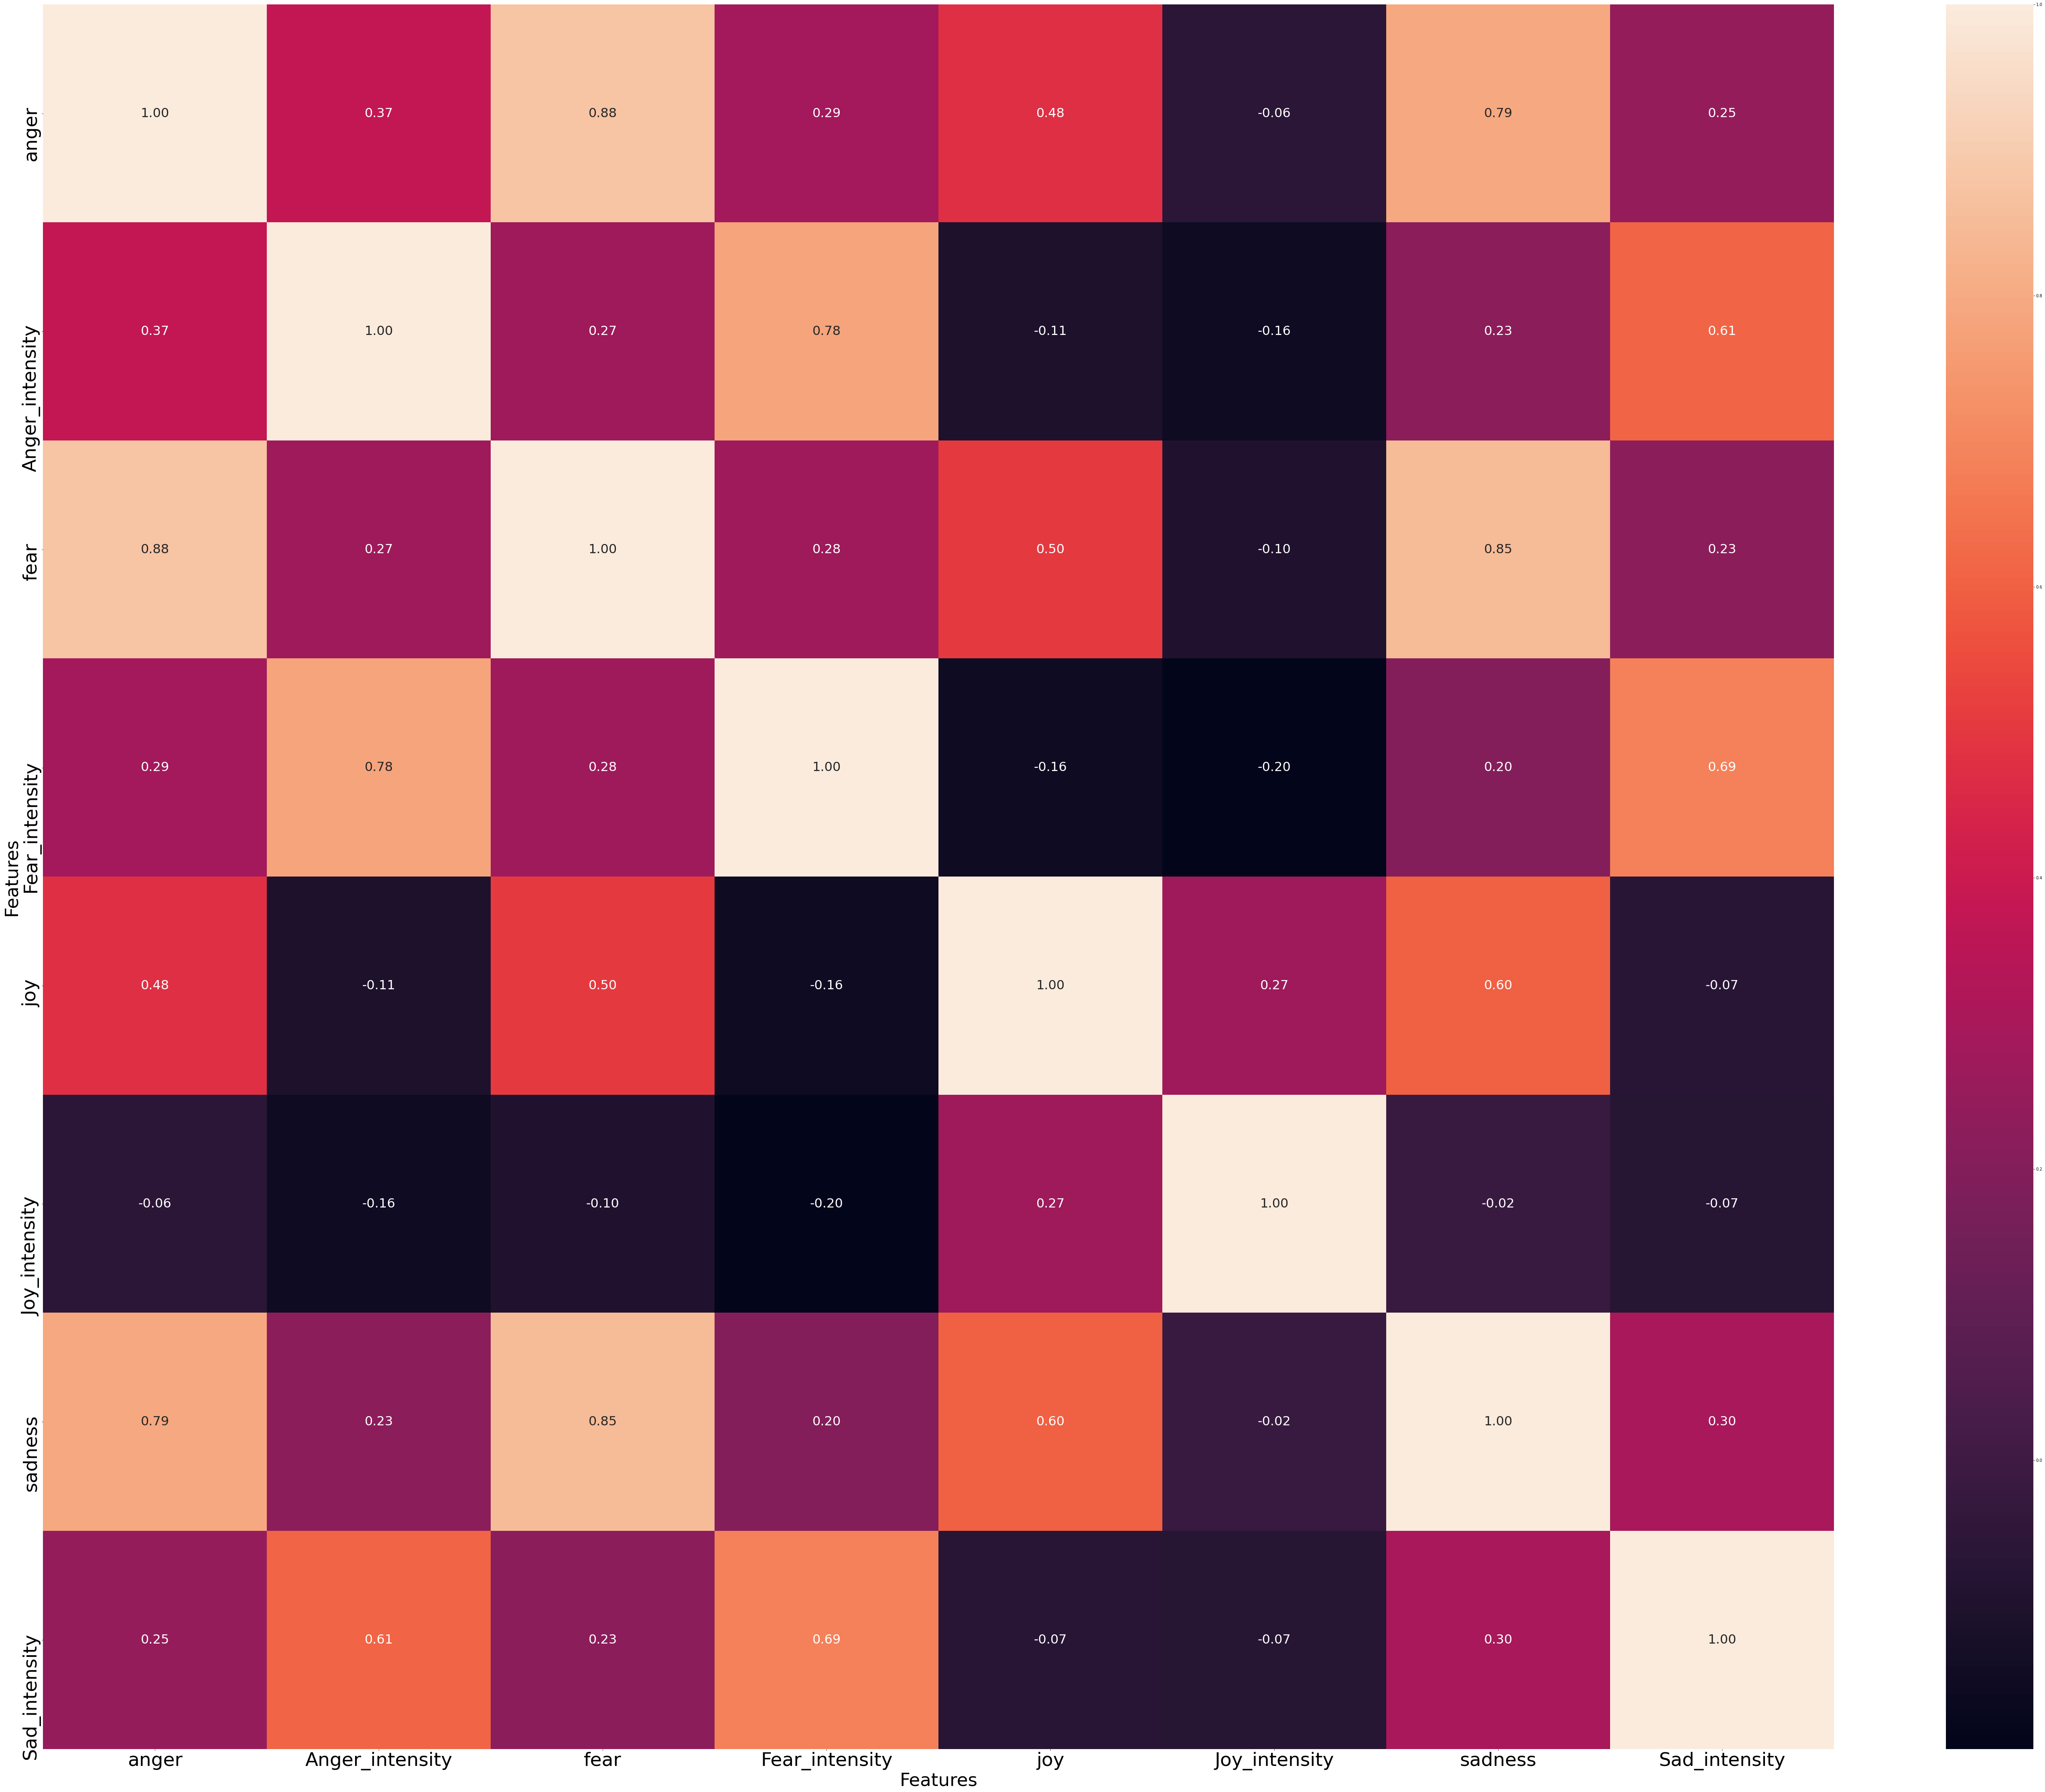

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_small = all_data[['anger','Anger_intensity', 'fear','Fear_intensity','joy','Joy_intensity','sadness','Sad_intensity']]

correlation_mat = df_small.corr()
fig, ax = plt.subplots(figsize=(100,80))

sns.heatmap(correlation_mat, annot = True, fmt='.2f', annot_kws={"size": 32}, ax=ax)
plt.xlabel("Features", fontsize=45)
plt.xticks(fontsize=47)
plt.ylabel("Features", fontsize=45)
plt.yticks(fontsize=47)
ax.set_yticklabels( [feature.get_text()[0:20] for feature in ax.get_yticklabels()])
ax.set_xticklabels( [feature.get_text()[0:20] for feature in ax.get_xticklabels()])


import io
import base64
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
base64HM = base64.b64encode(buffer.read())

plt.show()

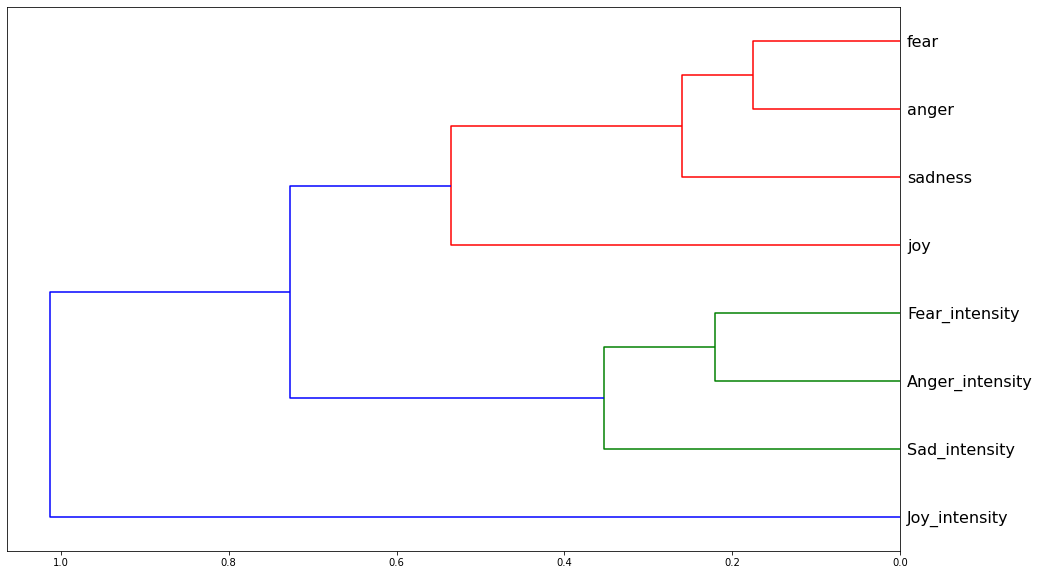

In [ ]:
from scipy.cluster import hierarchy as hc
from scipy import linalg, optimize, stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.cluster import hierarchy as hc
import numpy as np

corr = np.round(scipy.stats.spearmanr(df_small).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_small.columns, orientation='left', leaf_font_size=16)
plt.show()

In [ ]:
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort",ascending=False)
filtered_pairs = sorted_pairs[sorted_pairs < 1]
print(filtered_pairs)

anger            fear               0.877803
fear             anger              0.877803
sadness          fear               0.848587
fear             sadness            0.848587
anger            sadness            0.793032
sadness          anger              0.793032
Fear_intensity   Anger_intensity    0.780657
Anger_intensity  Fear_intensity     0.780657
Sad_intensity    Fear_intensity     0.686135
Fear_intensity   Sad_intensity      0.686135
Sad_intensity    Anger_intensity    0.606817
Anger_intensity  Sad_intensity      0.606817
sadness          joy                0.597448
joy              sadness            0.597448
                 fear               0.504237
fear             joy                0.504237
anger            joy                0.478611
joy              anger              0.478611
anger            Anger_intensity    0.374671
Anger_intensity  anger              0.374671
Sad_intensity    sadness            0.300185
sadness          Sad_intensity      0.300185
anger     

In [ ]:
all_data.drop('sadness', axis = 1, inplace=True)

In [ ]:
all_data.drop('fear', axis = 1, inplace=True)

In [ ]:
all_data.drop('anger', axis = 1, inplace=True)

In [ ]:
# Get fake news
data_fake = all_data[all_data['Is_Fake'] == 1]
# Get true news
data_true = all_data[all_data['Is_Fake'] == 0]

In [ ]:
all_data[all_data['Is_Fake'] == 1].count()

num_wds            1065
num_wds_title      1065
uniq_wds_body      1065
positivity         1065
joy                1065
disgust            1065
surprise           1065
trust              1065
anticipation       1065
negative           1065
Anger_intensity    1065
Anger_int_Title    1065
Fear_intensity     1065
Fear_int_Title     1065
Joy_intensity      1065
Joy_int_Title      1065
Sad_intensity      1065
Sad_int_Title      1065
nouns              1065
verbs              1065
adjectives         1065
adverbs            1065
pronouns           1065
punctuation        1065
verbs_title        1065
ratio              1065
comparative_no     1065
superlative_no     1065
curses             1065
Is_Fake            1065
dtype: int64

In [ ]:
all_data.dtypes

num_wds              int64
num_wds_title        int64
uniq_wds_body        int64
positivity           int64
joy                  int64
disgust              int64
surprise             int64
trust                int64
anticipation         int64
negative             int64
Anger_intensity    float64
Anger_int_Title    float64
Fear_intensity     float64
Fear_int_Title     float64
Joy_intensity      float64
Joy_int_Title      float64
Sad_intensity      float64
Sad_int_Title      float64
nouns                int64
verbs                int64
adjectives           int64
adverbs              int64
pronouns             int64
punctuation          int64
verbs_title          int64
ratio              float64
comparative_no       int64
superlative_no       int64
curses               int64
Is_Fake              int64
dtype: object

**Balancing the data**

In [ ]:
# For the balacing itself we use the function resample from sklearn.utils
from sklearn.utils import resample
# Resample majority class (benign)
data_true_downsampled = resample(data_true, 
                                 replace=False,    # sample without replacement
                                 n_samples=1079,    # to match minority class
                                 random_state=123) # reproducible results

print("Shape of the true data: "+str(data_true_downsampled.shape))
# Join the two sets again --> creats a balanced dataset
data_balanced = pd.concat([data_true_downsampled, data_fake])
# View the first and last lines of our dataframe
print(data_balanced.head())
print(data_balanced.tail())

Shape of the true data: (1079, 30)
      num_wds  num_wds_title  uniq_wds_body  ...  superlative_no  curses  Is_Fake
2580      158             12            130  ...               0       0        0
3551      739             13            436  ...               0       2        0
1634      347             16            197  ...               0       0        0
2724      644             14            360  ...               1       0        0
1663      214              7            148  ...               0       0        0

[5 rows x 30 columns]
      num_wds  num_wds_title  uniq_wds_body  ...  superlative_no  curses  Is_Fake
1082      289              6            195  ...               0       1        1
1083      939              8            484  ...               0       3        1
1084      219             18            142  ...               0       0        1
1085       56             14             49  ...               0       0        1
1086      153             10            

# Logistic regression 

In [ ]:
data_balanced['ratio']

2580    2.117647
3551    1.954023
1634    5.052632
2724    2.258621
1663    1.416667
          ...   
1082    2.371429
1083    2.489583
1084    1.300000
1085    1.750000
1086    1.000000
Name: ratio, Length: 2144, dtype: float64

In [ ]:
data_balanced.tail()

,num_wds,num_wds_title,uniq_wds_body,positivity,joy,disgust,surprise,trust,anticipation,negative,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,nouns,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses,Is_Fake
1082,289,6,195,19,3,5,7,12,7,22,0.192468,0.456333,0.302952,0.307333,0.063306,0.000000,0.210274,0.294333,83,35,29,3,1,1,1,2.371429,0,0,1,1
1083,939,8,484,41,12,20,8,27,21,65,0.337829,0.249667,0.463249,0.276000,0.224127,0.111000,0.448414,0.291667,239,96,124,25,3,0,0,2.489583,0,0,3,1
1084,219,18,142,6,4,3,2,7,6,14,0.378767,2.420000,0.365767,2.265000,0.315033,0.000000,0.183533,0.531000,39,30,13,6,2,0,3,1.300000,0,0,0,1
1085,56,14,49,3,1,0,1,3,2,4,0.055125,0.000000,0.000000,0.486000,0.220375,0.239667,0.000000,0.000000,14,8,4,1,0,0,1,1.750000,0,0,0,1
1086,153,10,115,14,10,0,2,10,5,9,0.106269,0.105333,0.105923,0.239667,0.431385,0.070667,0.120192,0.000000,23,23,9,5,1,0,2,1.000000,0,0,0,1


In [ ]:
data_balanced.head()

,num_wds,num_wds_title,uniq_wds_body,positivity,joy,disgust,surprise,trust,anticipation,negative,Anger_intensity,Anger_int_Title,Fear_intensity,Fear_int_Title,Joy_intensity,Joy_int_Title,Sad_intensity,Sad_int_Title,nouns,verbs,adjectives,adverbs,pronouns,punctuation,verbs_title,ratio,comparative_no,superlative_no,curses,Is_Fake
2580,158,12,130,8,4,1,2,2,5,4,0.042840,0.0000,0.053200,0.000,0.433040,0.515667,0.048280,0.000,36,17,25,7,0,0,0,2.117647,2,0,0,0
3551,739,13,436,40,2,6,14,33,8,26,0.185508,0.1875,0.232960,0.000,0.129127,0.000000,0.150389,0.125,170,87,71,20,2,0,1,1.954023,3,0,2,0
1634,347,16,197,19,3,4,3,16,10,13,0.224714,0.0995,0.298750,0.361,0.090304,0.226500,0.251839,0.000,96,19,40,7,0,1,0,5.052632,0,0,0,0
2724,644,14,360,53,10,5,6,31,23,13,0.082863,0.0000,0.085299,0.000,0.153325,0.000000,0.054444,0.000,131,58,54,21,1,1,0,2.258621,2,1,0,0
1663,214,7,148,8,4,4,1,7,5,5,0.140862,0.0000,0.150690,0.000,0.127414,0.000000,0.080724,0.000,34,24,32,9,0,0,1,1.416667,1,0,0,0


In [ ]:
data_balanced.shape

(2144, 30)

Logistic Regression 1

In [ ]:
# Import logistic regression class, accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Prepare datframe for machine-learning (split in x and y)
X = data_balanced.drop(columns = 'Is_Fake')
y = data_balanced['Is_Fake']
# Initiate the model score list
model_score = []
# Initalize list of true labels
true_labels = []
# Initialize list of predicted labels
predicted_labels = []
# Instanciate our Cross-Validation (cv) object
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
# Instanciate Logistic Regression 
log_reg = LogisticRegression(penalty='none', random_state=42, solver='saga', max_iter = 10000, warm_start=True)
# Loop through the splits produced by cv
for i_train, i_test in our_cv.split(X):
    # Define our current training and test set according to the current split
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # Fitting the logistic regression
    log_reg.fit(X_train.astype('float'), y_train.astype('int'))
    # Predicting the testing data
    y_pred_test = log_reg.predict(X_test)
    # Getting accuracy score
    model_score.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))
    # Add true labels to list
    true_labels.extend(y_test.astype('int'))
    # Add predicted labels to list
    predicted_labels.extend(y_pred_test.astype('int'))
    coef = log_reg.coef_.tolist()[0]

## Classification performance


In [ ]:
# Calculate the average accuracy over the 10-times 10-fold cross validation 
# Using n.mean over the 100 values in model_score
print("Average accuracy of the logistic regression model is: "+str(np.mean(model_score))+" %")

Average accuracy of the logistic regression model is: 0.7717880895457508 %


In [ ]:
labels = data_balanced.columns.values[:-1].tolist()
print(labels)

['num_wds', 'num_wds_title', 'uniq_wds_body', 'positivity', 'joy', 'disgust', 'surprise', 'trust', 'anticipation', 'negative', 'Anger_intensity', 'Anger_int_Title', 'Fear_intensity', 'Fear_int_Title', 'Joy_intensity', 'Joy_int_Title', 'Sad_intensity', 'Sad_int_Title', 'nouns', 'verbs', 'adjectives', 'adverbs', 'pronouns', 'punctuation', 'verbs_title', 'ratio', 'comparative_no', 'superlative_no', 'curses']


In [ ]:
print(coef)

[0.02043545119063447, 0.05273304555167025, -0.010095605911759233, 0.02026941801562657, -0.027794193269267155, 0.027251960903475383, 0.024935280522300363, -0.03679506032528801, -0.015203857995848348, 0.03769810518985767, -0.0031046974165157993, -0.016478487096006827, 0.010996100388338825, 0.014170997144907582, 0.00898965497750698, -0.014092242936474016, 0.008468433691788655, 0.006753097598544632, -0.029329735860906665, -0.03775483355837388, -0.039479267999358796, -0.11095614018943352, -0.06690156257499721, -0.03078653306702247, 0.24922032678872041, -0.05170471423869275, -0.43534800113845273, -0.039614345275506266, 0.055063703656390725]


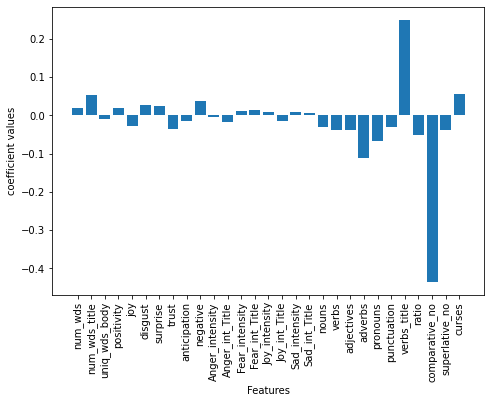

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

**Visualization**

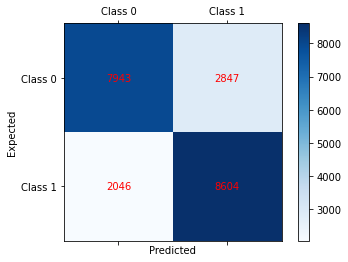

In [ ]:
# Create confusion matrix to visualize the correct/incorrect predictions
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
conf_mat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
# Define the labels for the confusion matrix
labels = ['Class 0', 'Class 1']
# Initiate an empty figure
fig = plt.figure()
# Add axis to the figure
ax = fig.add_subplot(111)
# Add the actual matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
# Show a colorbar
fig.colorbar(cax)
# Remove x and y ticks
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
# Add x and y labels
plt.xlabel('Predicted')
plt.ylabel('Expected')
# Add new x and y ticks
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')
# Show the plot
plt.show()

# Logistic Regression 2 (μάλλον λάθος)

In [ ]:
X = data_balanced.drop(columns='Is_Fake')
y = data_balanced.Is_Fake
y = y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Διαχωρισμός σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = np.ravel(scaler_targets.transform(y_train))
X_test = scaler_features.transform(X_test)
y_test = np.ravel(scaler_targets.transform(y_test)) 
log_reg = LogisticRegression(penalty='none', random_state=42, solver='saga', max_iter = 2000, warm_start=True)
log_reg.fit(X_train.astype('float'), y_train.astype('int'))
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
model_score.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))
coef2 = log_reg.coef_.tolist()[0]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# Calculate the average accuracy over the 10-times 10-fold cross validation 
# Using n.mean over the 100 values in model_score
print("Average accuracy of the logistic regression model is: "+str(np.mean(model_score))+" %")

Average accuracy of the logistic regression model is: 0.7724220777237374 %


**Importances**

In [ ]:
print(coef2)

[10.077405883937978, -0.04368966410965593, -1.9564905003907325, 0.6034136283022188, -0.7797416892707782, -0.07376783518149121, 0.44845388350422044, -0.5019256459775018, -0.15954586775059654, 0.6722778474144971, -0.17611307760712772, -0.2081126006022184, 0.06574477008384691, 0.33498848893755984, 0.20947654308883198, -0.09617470162802841, 0.04461011123021538, -0.02576245711618732, -2.7284302462998458, -2.489714110371484, -2.217808734245419, -0.9843431100539864, -0.10754122102843977, -0.05634205852468375, 0.8090863795147004, -0.2767948910887456, -7.225752189532968, -0.8485064329583129, 0.31974983808337276]


In [ ]:
labels = data_balanced.columns.values[:-1].tolist()
print(labels)

['num_wds', 'num_wds_title', 'uniq_wds_body', 'positivity', 'joy', 'disgust', 'surprise', 'trust', 'anticipation', 'negative', 'Anger_intensity', 'Anger_int_Title', 'Fear_intensity', 'Fear_int_Title', 'Joy_intensity', 'Joy_int_Title', 'Sad_intensity', 'Sad_int_Title', 'nouns', 'verbs', 'adjectives', 'adverbs', 'pronouns', 'punctuation', 'verbs_title', 'ratio', 'comparative_no', 'superlative_no', 'curses']


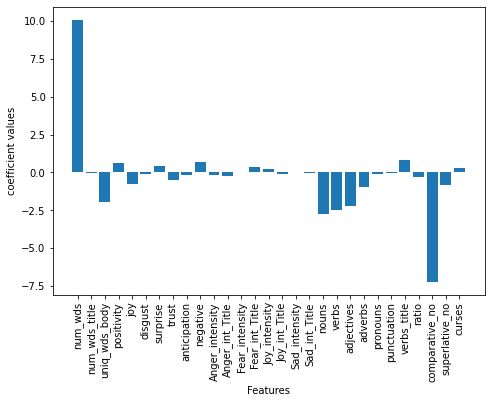

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,coef2)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

In [ ]:
# αντίστροφος μετασχηματισμός συντελεστών. 
coef_retransformed = scaler_features.inverse_transform(coef)
print(coef_retransformed)

[ 3.19814765e+02  1.24966599e+01  1.80763477e+02  1.84571491e+01
  5.16162113e+00  3.38606240e+00  4.31485493e+00  1.17823413e+01
  8.25372785e+00  1.24232658e+01  1.51815308e-01  1.94733457e-01
  2.32579713e-01  3.13140351e-01  1.81874408e-01  1.49601513e-01
  1.37488017e-01  1.73403866e-01  7.00831925e+01  3.04020993e+01
  3.08955463e+01  6.81077179e+00  1.29017441e+00  4.74167453e-01
  1.29603394e+00  2.35571721e+00 -3.90576783e-02  4.12553333e-02
  8.23613754e-01]


## Decision trees 1 (classifier)

In [ ]:
# Import decision tree class
from sklearn import tree
# Initiate the model score list
model_score = []
# Initalize list of true labels
true_labels = []
# Initialize list of predicted labels
predicted_labels = []
# Instanciate our Cross-Validation (cv) object
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
X = data_balanced.drop(columns = 'Is_Fake')
y = data_balanced['Is_Fake']
# Instanciate decision tree classifier (this is a fully grown, hence not optimized decison tree)
dec_tree = tree.DecisionTreeClassifier()
# Loop through the splits produced by cv
for i_train, i_test in our_cv.split(X):
    # Define our training and test set according to current split
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # Fitting the tree
    dec_tree.fit(X_train, y_train.astype('int'))
    # Predicting the testing data
    y_pred_test = dec_tree.predict(X_test)
    # Getting accuracy score
    model_score.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))
    # Add true labels to list
    true_labels.extend(y_test.astype('int'))
    # Add predicted labels to list
    predicted_labels.extend(y_pred_test.astype('int'))

In [ ]:
# Calculate the average accuracy over the 10-times 10-fold cross validation 
# Using n.mean over the 100 values in model_score
print("Average accuracy of the decision tree model is: "+str(np.mean(model_score))+" %")

Average accuracy of the decision tree model is: 0.7888978482938491 %


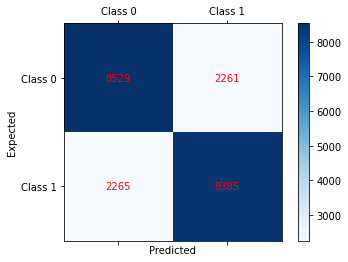

In [ ]:
# Create confusion matrix to visualize the correct/incorrect predictions
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
conf_mat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
# Define the labels for the confusion matrix
labels = ['Class 0', 'Class 1']
# Initiate an empty figure
fig = plt.figure()
# Add axis to the figure
ax = fig.add_subplot(111)
# Add the actual matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
# Show a colorbar
fig.colorbar(cax)
# Remove x and y ticks
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
# Add x and y labels
plt.xlabel('Predicted')
plt.ylabel('Expected')
# Add new x and y ticks
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')
# Show the plot
plt.show()

**Importances**

In [ ]:
print(dec_tree.feature_importances_)

[0.0220011  0.04983365 0.00738871 0.0110506  0.002736   0.004301
 0.00707421 0.03806868 0.03445679 0.01375193 0.03305191 0.01973137
 0.0104278  0.00681277 0.04261694 0.01285876 0.03245402 0.01614071
 0.02394109 0.01279487 0.02391306 0.03185695 0.00515961 0.00968854
 0.06073811 0.04418117 0.39163293 0.0177265  0.01361022]


In [ ]:
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

[0.022001103666664332, 0.04983365218886956, 0.007388710404444673, 0.01105060379933234, 0.002735997054178872, 0.004301002552750805, 0.007074214508525975, 0.03806868052677051, 0.034456791606275856, 0.013751926393122926, 0.033051905772910645, 0.01973136640093397, 0.010427803813957184, 0.006812770831494739, 0.04261693514423362, 0.012858761340426728, 0.032454018884272975, 0.01614071185179183, 0.023941085216865998, 0.012794867181975804, 0.02391305948876042, 0.0318569514285805, 0.005159605010326913, 0.009688543685020637, 0.06073810618566909, 0.04418117117631832, 0.39163292775327346, 0.01772650334531175, 0.013610222786939439]


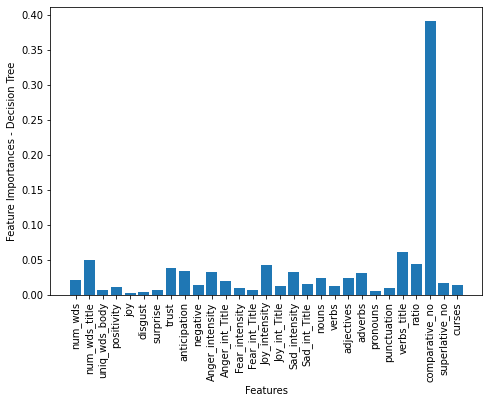

In [ ]:
labels = data_balanced.columns.values[:-1].tolist()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

**Υπολογισμός του max depth**


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf.tree_.max_depth)

21


In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_leaf_nodes=18, random_state=0)
estimator.fit(X_train, y_train)
val_pred = estimator.predict(X_test)

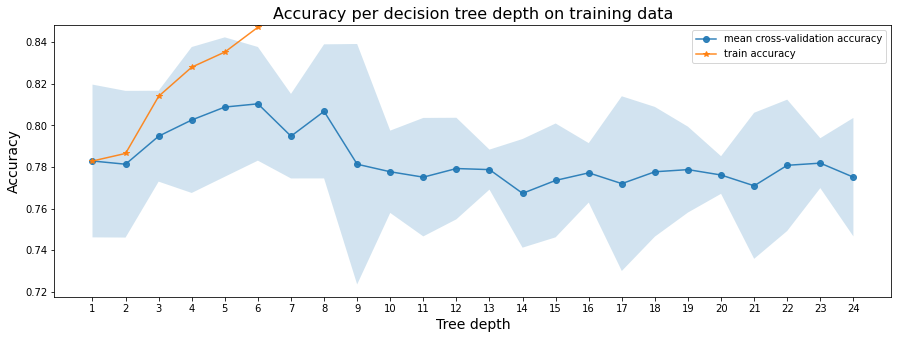

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-6 tree achieves the best mean cross-validation accuracy 81.03627 +/- 1.36497% on training dataset


**Τύπωμα Δέντρου**

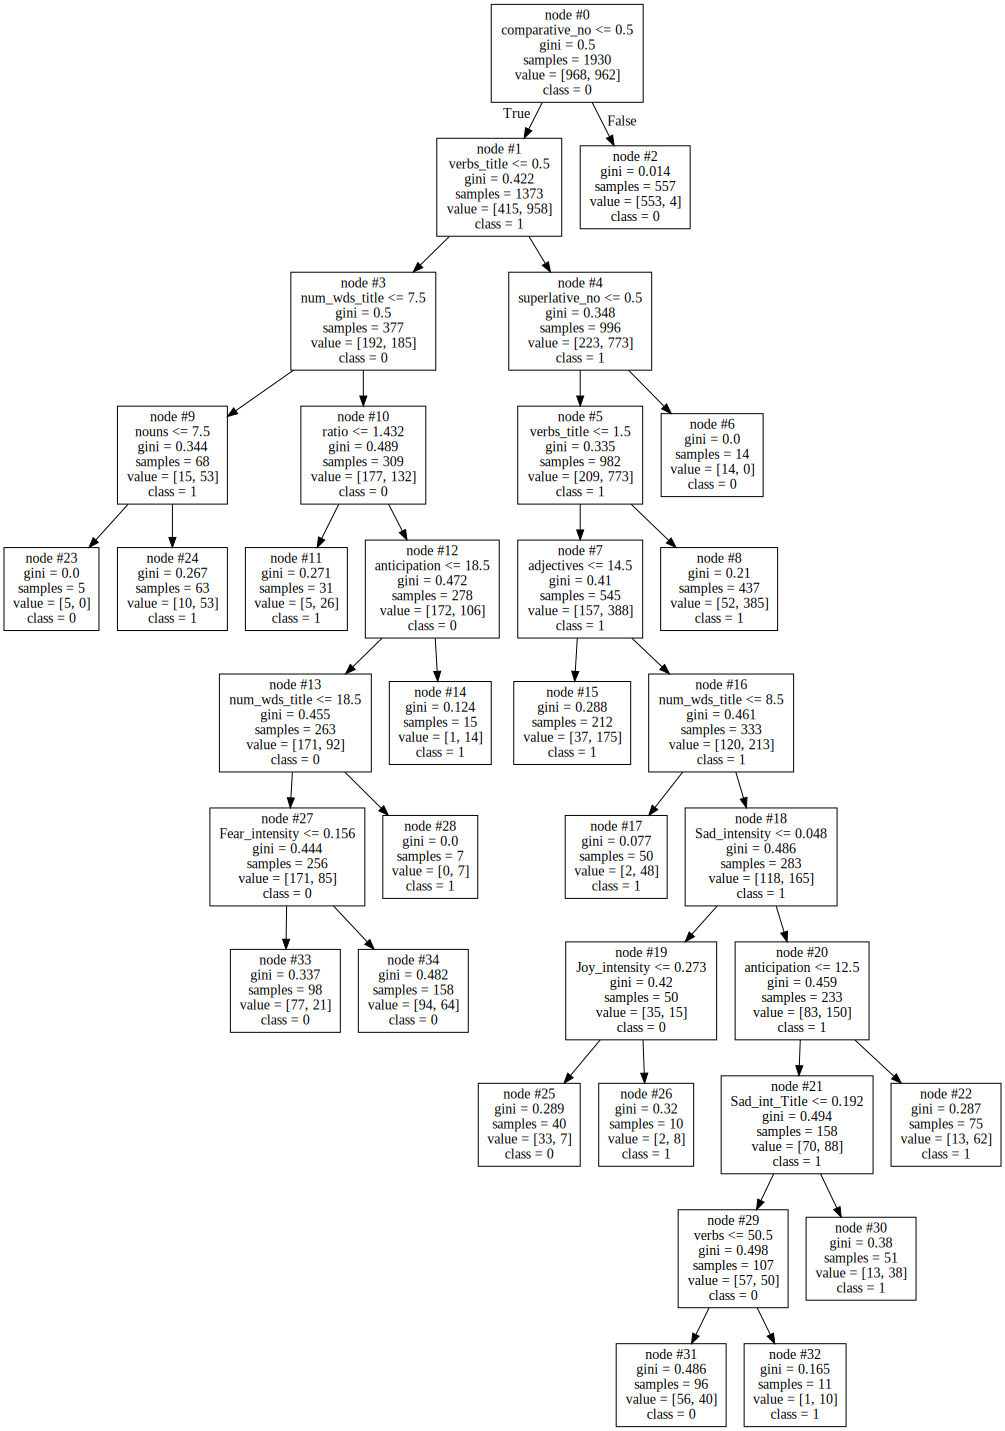

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(estimator)
graphviz.Source(export_graphviz(estimator,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=["0", "1"],
                                node_ids = True,
                                impurity=True))

## Random Forest  1 (classifier)

In [ ]:
# Import Random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Initiate the model score list
model_score = []
# Initalize list of true labels
true_labels = []
# Initialize list of predicted labels
predicted_labels = []
X = data_balanced.drop(columns = 'Is_Fake')
y = data_balanced['Is_Fake']
# Instanciate our Cross-Validation (cv) object
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
# Instanciate decision tree classifier 
dec_for =RandomForestClassifier(n_estimators=100)
# Loop through the splits produced by cv
for i_train, i_test in our_cv.split(X):
    # Define our training and test set according to current split
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # Fitting the tree
    dec_for.fit(X_train, y_train.astype('int'))
    # Predicting the testing data
    y_pred_test = dec_for.predict(X_test)
    # Getting accuracy score
    model_score.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))
    # Add true labels to list
    true_labels.extend(y_test.astype('int'))
    # Add predicted labels to list
    predicted_labels.extend(y_pred_test.astype('int'))

In [ ]:
# Calculate the average accuracy over the 10-times 10-fold cross validation 
# Using n.mean over the 100 values in model_score
print("Average accuracy of the random forests model is: "+str(np.mean(model_score))+" %")

Average accuracy of the random forests model is: 0.8555522712453815 %


**Importances**

In [ ]:
forest_imp = dec_for.feature_importances_.tolist()
print(forest_imp)

[0.03837271382288647, 0.050631950626887814, 0.040500318497569396, 0.024744639150760882, 0.020928751797834724, 0.01702803911807651, 0.014598006108828037, 0.022287151471401617, 0.025043635160575096, 0.02149145895029908, 0.029097211319100674, 0.0163346907949298, 0.030057267016926167, 0.020981369861829406, 0.029305861205787865, 0.014485619732548988, 0.03308989095418983, 0.017383715090186148, 0.030739064103799174, 0.025303713406026516, 0.049600743867268766, 0.0445087940072633, 0.011660144686750437, 0.012669650561527258, 0.05475363597637109, 0.03898024223691491, 0.2457192673674896, 0.01209256242266728, 0.0076098906833029795]


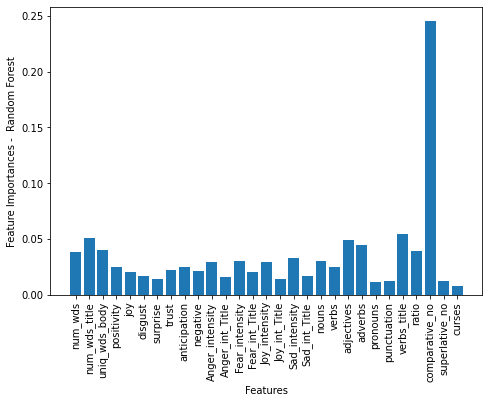

In [ ]:
labels = data_balanced.columns.values[:-1].tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,forest_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances -  Random Forest')
plt.show()

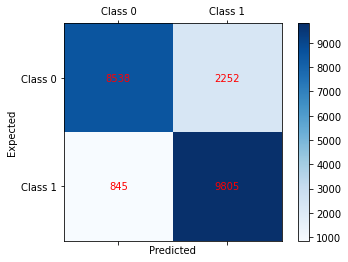

In [ ]:
# Create confusion matrix to visualize the correct/incorrect predictions
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
conf_mat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
# Define the labels for the confusion matrix
labels = ['Class 0', 'Class 1']
# Initiate an empty figure
fig = plt.figure()
# Add axis to the figure
ax = fig.add_subplot(111)
# Add the actual matrix
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
# Show a colorbar
fig.colorbar(cax)
# Remove x and y ticks
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
# Add x and y labels
plt.xlabel('Predicted')
plt.ylabel('Expected')
# Add new x and y ticks
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')
# Show the plot
plt.show()